In [2]:
using CSV
using Plots
using DataFrames

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1260
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


In [3]:
mutable struct data
    df::DataFrame
    ptx::Float32
    pty::Float32
    ptz::Float32
end

In [4]:
ogs5_THM=Array{data}(undef, 3)

3-element Array{data,1}:
 #undef
 #undef
 #undef

## Read in OGS5 data, tuple defines all four observation points

measurement points:

In [5]:
pt1=[4.593,32.966,2.517]
pt2=[7.142,32.588,4.287]
pt3=[11.66,32.765,8.508]

3-element Array{Float64,1}:
 11.66
 32.765
  8.508

In [6]:
measurements_press=CSV.read("1_Interval Pressures BFEA002to007_PRE_01-06.csv")
measurements_temp=CSV.read("2_Temperatures BFEA002to007_PRE_01-06.csv")

,Time (12h av),BFEA002_TEM_01,BFEA002_TEM_02,BFEA002_TEM_03,BFEA002_TEM_04
,String,Float64?,Float64?,Float64?,Float64?
1,01.01.2012 00:00,missing,missing,missing,missing
2,01.01.2012 12:00,missing,missing,missing,missing
3,02.01.2012 00:00,missing,missing,missing,missing
4,02.01.2012 12:00,missing,missing,missing,missing
5,03.01.2012 00:00,missing,missing,missing,missing
6,03.01.2012 12:00,missing,missing,missing,missing
7,04.01.2012 00:00,missing,missing,missing,missing
8,04.01.2012 12:00,missing,missing,missing,missing
9,05.01.2012 00:00,missing,missing,missing,missing


In [7]:
exp_press = measurements_press[1941:end,:]

,BFEA002_PRE_01_time,BFEA002_PRE_01,BFEA002_PRE_02,BFEA002_PRE_03,BFEA002_PRE_04
,String,Float64?,Float64?,Float64?,Float64?
1,01.11.2014 00:00,1139.34,1095.81,831.967,566.415
2,01.11.2014 12:00,1139.09,1095.64,831.815,566.348
3,03.11.2014 00:00,1137.89,1094.52,830.887,565.81
4,03.11.2014 12:00,1137.28,1093.99,830.36,565.447
5,04.11.2014 00:00,1136.32,1093.04,829.452,564.654
6,04.11.2014 12:00,1135.94,1092.74,829.217,564.555
7,05.11.2014 00:00,1135.93,1092.83,829.388,564.852
8,05.11.2014 12:00,1136.33,1093.34,829.972,565.569
9,06.11.2014 00:00,1136.55,1093.63,830.34,565.996


In [8]:
exp_temp = measurements_temp[2040:end,:]

,Time (12h av),BFEA002_TEM_01,BFEA002_TEM_02,BFEA002_TEM_03,BFEA002_TEM_04
,String,Float64?,Float64?,Float64?,Float64?
1,01.11.2014 00:00,16.9423,16.979,17.0702,17.0957
2,01.11.2014 12:00,16.9491,16.9686,17.0809,17.0888
3,03.11.2014 00:00,16.9429,16.9618,17.0824,17.09
4,03.11.2014 12:00,16.9603,16.9598,17.0774,17.0856
5,04.11.2014 00:00,16.9578,16.9616,17.0777,17.0979
6,04.11.2014 12:00,16.942,16.9784,17.0896,17.0905
7,05.11.2014 00:00,16.9632,16.9733,17.0835,17.0956
8,05.11.2014 12:00,16.9522,16.9623,17.0876,17.0986
9,06.11.2014 00:00,16.9616,16.9748,17.0849,17.0939


In [9]:
exp_press[:time] = collect(1:length(exp_press[:,1]))*60*60*12

3170-element Array{Int64,1}:
     43200
     86400
    129600
    172800
    216000
    259200
    302400
    345600
    388800
    432000
    475200
    518400
    561600
         ⋮
 136468800
 136512000
 136555200
 136598400
 136641600
 136684800
 136728000
 136771200
 136814400
 136857600
 136900800
 136944000

In [10]:
exp_temp[:time] = collect(1:length(exp_temp[:,1]))*60*60*12

3169-element Array{Int64,1}:
     43200
     86400
    129600
    172800
    216000
    259200
    302400
    345600
    388800
    432000
    475200
    518400
    561600
         ⋮
 136425600
 136468800
 136512000
 136555200
 136598400
 136641600
 136684800
 136728000
 136771200
 136814400
 136857600
 136900800

In [11]:
ogs5_THM[1]=data(CSV.read("ogs5_heat_BFEA002.csv"),pt1[1],pt1[2],pt1[3])
ogs5_THM[2]=data(CSV.read("ogs5_heat_BFEA003.csv"),pt2[1],pt2[2],pt2[3])
ogs5_THM[3]=data(CSV.read("ogs5_heat_BFEA004.csv"),pt3[1],pt3[2],pt3[3])
#ogs5_THM[1]=data(CSV.read("ogs5_heat_0_30_1-8.csv"),0.0,30.0,1.8)
#ogs5_THM[2]=data(CSV.read("ogs5_heat_0_30_3.csv"),0.0,30.0,3.0)
#ogs5_THM[3]=data(CSV.read("ogs5_heat_10_30_5.csv"),10.0,30.0,5.0)
#ogs5_THM[4]=data(CSV.read("ogs5_heat_0_30_20.csv"),0.0,30.0,20.0)

data(116×38 DataFrame. Omitted printing of 32 columns
│ Row │ N     │ Time    │ avg(TEMPERATURE1) │ avg(X)  │ avg(Y)  │ avg(Z)  │
│     │ Int64 │ Float64 │ Float64           │ Float64 │ Float64 │ Float64 │
├─────┼───────┼─────────┼───────────────────┼─────────┼─────────┼─────────┤
│ 1   │ 1     │ 0.0     │ 16.46             │ 12.138  │ 33.2    │ 8.9998  │
│ 2   │ 1     │ 2.0     │ 16.46             │ 12.138  │ 33.2    │ 8.9998  │
│ 3   │ 1     │ 4.0     │ 16.46             │ 12.138  │ 33.2    │ 8.9998  │
│ 4   │ 1     │ 6.0     │ 16.46             │ 12.138  │ 33.2    │ 8.9998  │
│ 5   │ 1     │ 8.0     │ 16.46             │ 12.138  │ 33.2    │ 8.9998  │
│ 6   │ 1     │ 10.0    │ 16.46             │ 12.138  │ 33.2    │ 8.9998  │
│ 7   │ 1     │ 12.0    │ 16.46             │ 12.138  │ 33.2    │ 8.9998  │
│ 8   │ 1     │ 14.0    │ 16.46             │ 12.138  │ 33.2    │ 8.9998  │
│ 9   │ 1     │ 16.0    │ 16.46             │ 12.138  │ 33.2    │ 8.9998  │
│ 10  │ 1     │ 18.0    │ 16.46   

In [12]:
for i in 1:3
    insert!(ogs5_THM[i].df, 3, ogs5_THM[i].df[:Time]*24*60*60, :Time_s)
end

In [13]:
insert!(ogs5_THM[1].df, 4,CSV.read("ogs5_richards_BFEA002.csv")["avg(PRESSURE1)"], :pressure )
insert!(ogs5_THM[2].df, 4,CSV.read("ogs5_richards_BFEA003.csv")["avg(PRESSURE1)"], :pressure )
insert!(ogs5_THM[3].df, 4,CSV.read("ogs5_richards_BFEA004.csv")["avg(PRESSURE1)"], :pressure )

,N,Time,Time_s,pressure,avg(TEMPERATURE1),avg(X),avg(Y),avg(Z)
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,0.0,0.0,1.524e6,16.46,12.138,33.2,8.9998
2,1,2.0,172800.0,1.524e6,16.46,12.138,33.2,8.9998
3,1,4.0,345600.0,1.5239e6,16.46,12.138,33.2,8.9998
4,1,6.0,518400.0,1.5239e6,16.46,12.138,33.2,8.9998
5,1,8.0,691200.0,1.5239e6,16.46,12.138,33.2,8.9998
6,1,10.0,864000.0,1.5238e6,16.46,12.138,33.2,8.9998
7,1,12.0,1.0368e6,1.5238e6,16.46,12.138,33.2,8.9998
8,1,14.0,1.2096e6,1.5238e6,16.46,12.138,33.2,8.9998
9,1,16.0,1.3824e6,1.5237e6,16.46,12.138,33.2,8.9998


In [14]:
#insert!(ogs5_THM[1].df, 4,CSV.read("ogs5_mech_0_30_1-8.csv")["avg(DISPLACEMENT (0))"], :displ0 )
#insert!(ogs5_THM[2].df, 4,CSV.read("ogs5_mech_0_30_3.csv")["avg(DISPLACEMENT (0))"], :displ0 )
#insert!(ogs5_THM[3].df, 4,CSV.read("ogs5_mech_10_30_5.csv")["avg(DISPLACEMENT (0))"], :displ0 )
#insert!(ogs5_THM[4].df, 4,CSV.read("ogs5_mech_0_30_20.csv")["avg(DISPLACEMENT (0))"], :displ0 )

In [15]:
#insert!(ogs5_THM[1].df, 4,CSV.read("ogs5_mech_0_30_1-8.csv")["avg(DISPLACEMENT (1))"], :displ1 )
#insert!(ogs5_THM[2].df, 4,CSV.read("ogs5_mech_0_30_3.csv")["avg(DISPLACEMENT (1))"], :displ1 )
#insert!(ogs5_THM[3].df, 4,CSV.read("ogs5_mech_10_30_5.csv")["avg(DISPLACEMENT (1))"], :displ1 )
#insert!(ogs5_THM[4].df, 4,CSV.read("ogs5_mech_0_30_20.csv")["avg(DISPLACEMENT (1))"], :displ1 )

In [16]:
#insert!(ogs5_THM[1].df, 4,CSV.read("ogs5_mech_0_30_1-8.csv")["avg(DISPLACEMENT (2))"], :displ2 )
#insert!(ogs5_THM[2].df, 4,CSV.read("ogs5_mech_0_30_3.csv")["avg(DISPLACEMENT (2))"], :displ2 )
#insert!(ogs5_THM[3].df, 4,CSV.read("ogs5_mech_10_30_5.csv")["avg(DISPLACEMENT (2))"], :displ2 )
#insert!(ogs5_THM[4].df, 4,CSV.read("ogs5_mech_0_30_20.csv")["avg(DISPLACEMENT (2))"], :displ2 )

# Temp/Press OGS5 THM (richards) output, 3 points vs time in s

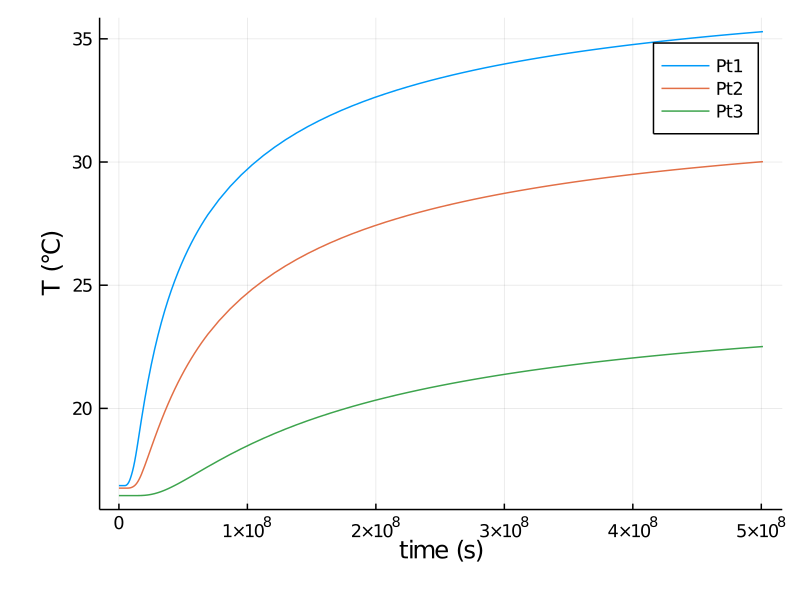

In [17]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[1].df["avg(TEMPERATURE1)"], label="Pt1", size=(800,600),thickness_scaling=1.5)
plot!(ogs5_THM[1].df["Time_s"],ogs5_THM[2].df["avg(TEMPERATURE1)"], label="Pt2")
plot!(ogs5_THM[1].df["Time_s"],ogs5_THM[3].df["avg(TEMPERATURE1)"], label="Pt3")
xlabel!("time (s)")
ylabel!("T (°C)")

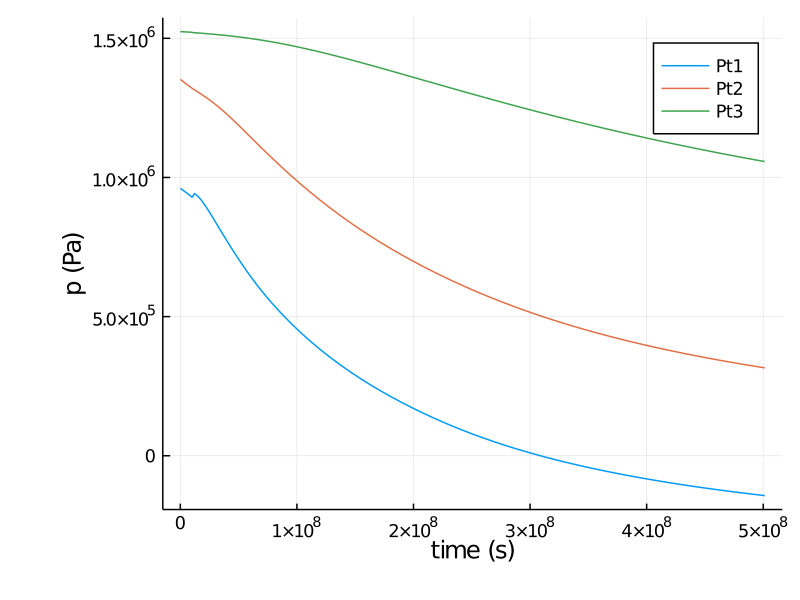

In [18]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[1].df[:pressure], label="Pt1", size=(800,600),thickness_scaling=1.5)
plot!(ogs5_THM[2].df["Time_s"],ogs5_THM[2].df[:pressure], label="Pt2")
plot!(ogs5_THM[3].df["Time_s"],ogs5_THM[3].df[:pressure], label="Pt3")
xlabel!("time (s)")
ylabel!("p (Pa)")

In [19]:
#plot(ogs5_THM[1].df["Time_s"],ogs5_THM[1].df[:displ1], label="Pt1", size=(800,600),thickness_scaling=1.5)
#plot!(ogs5_THM[2].df["Time_s"],ogs5_THM[2].df[:displ1], label="Pt2")
#plot!(ogs5_THM[3].df["Time_s"],ogs5_THM[3].df[:displ1], label="Pt3")
#plot!(ogs5_THM[3].df["Time_s"],ogs5_THM[4].df[:displ1], label="Pt4")
#xlabel!("time (s)")
#ylabel!("u_z (m)")

# FE-exp OGS5 THM richards vs THM sat anisotropic elastic

In [20]:
ogs6_HTm1=Array{data}(undef, 4)
ogs6_THM=Array{data}(undef, 4)
ogs6_HTm2=Array{data}(undef, 4)

4-element Array{data,1}:
 #undef
 #undef
 #undef
 #undef

In [30]:
ogs6_THM_bctest=Array{data}(undef, 3)
ogs6_THM_biottest=Array{data}(undef, 3)

3-element Array{data,1}:
 #undef
 #undef
 #undef

In [31]:
ogs6_THM_bctest[1]=data(CSV.read("ogs6_THM_anisoelastic_bc-test_BFEA002.csv"),pt1[1],pt1[2],pt1[3])
ogs6_THM_bctest[2]=data(CSV.read("ogs6_THM_anisoelastic_bc-test_BFEA003.csv"),pt2[1],pt2[2],pt3[3])
ogs6_THM_bctest[3]=data(CSV.read("ogs6_THM_anisoelastic_bc-test_BFEA004.csv"),pt3[1],pt2[2],pt3[3])
ogs6_THM_biottest[1]=data(CSV.read("ogs6_THM_anisoelastic_biot0_BFEA002.csv"),pt1[1],pt1[2],pt1[3])
ogs6_THM_biottest[2]=data(CSV.read("ogs6_THM_anisoelastic_biot0_BFEA003.csv"),pt2[1],pt2[2],pt3[3])
ogs6_THM_biottest[3]=data(CSV.read("ogs6_THM_anisoelastic_biot0_BFEA004.csv"),pt3[1],pt2[2],pt3[3])

data(116×234 DataFrame. Omitted printing of 230 columns
│ Row │ N     │ Time     │ avg(HydraulicFlow) │ avg(NodalForces (0)) │
│     │ Int64 │ Float64  │ Float64            │ Float64              │
├─────┼───────┼──────────┼────────────────────┼──────────────────────┤
│ 1   │ 1     │ 0.0      │ 0.0                │ 0.0                  │
│ 2   │ 1     │ 172800.0 │ 1.2058e-12         │ 2.664e-25            │
│ 3   │ 1     │ 345600.0 │ 1.1029e-12         │ -1.2326e-24          │
│ 4   │ 1     │ 518400.0 │ 9.0396e-13         │ 1.2749e-24           │
│ 5   │ 1     │ 691200.0 │ 8.8185e-13         │ -7.3558e-26          │
│ 6   │ 1     │ 864000.0 │ 8.3813e-13         │ -3.305e-25           │
│ 7   │ 1     │ 1.0368e6 │ 6.3944e-13         │ 3.2107e-24           │
│ 8   │ 1     │ 1.2096e6 │ 6.6389e-13         │ 1.6134e-24           │
│ 9   │ 1     │ 1.3824e6 │ 6.3545e-13         │ -6.9934e-25          │
│ 10  │ 1     │ 1.5552e6 │ 5.4994e-13         │ -4.6341e-25          │
⋮
│ 106 │ 1     │ 4.1

In [21]:
#ogs6_HTm1[1]=data(CSV.read("ogs6_HTm1_0_30_1-8.csv"),0.0,30.0,1.8)
#ogs6_HTm1[2]=data(CSV.read("ogs6_HTm1_0_30_3.csv"),0.0,30.0,3.0)
#ogs6_HTm1[3]=data(CSV.read("ogs6_HTm1_10_30_5.csv"),10.0,30.0,5.0)
#ogs6_HTm1[4]=data(CSV.read("ogs6_HTm1_0_30_20.csv"),0.0,30.0,20.0)
#ogs6_HTm2[1]=data(CSV.read("ogs6_HTm2_0_30_1-8.csv"),0.0,30.0,1.8)
#ogs6_HTm2[2]=data(CSV.read("ogs6_HTm2_0_30_3.csv"),0.0,30.0,3.0)
#ogs6_HTm2[3]=data(CSV.read("ogs6_HTm2_10_30_5.csv"),10.0,30.0,5.0)
#ogs6_HTm2[4]=data(CSV.read("ogs6_HTm2_0_30_20.csv"),0.0,30.0,20.0)
ogs6_THM[1]=data(CSV.read("ogs6_THM_anisoelastic_BFEA002.csv"),pt1[1],pt1[2],pt1[3])
ogs6_THM[2]=data(CSV.read("ogs6_THM_anisoelastic_BFEA003.csv"),pt2[1],pt2[2],pt3[3])
ogs6_THM[3]=data(CSV.read("ogs6_THM_anisoelastic_BFEA004.csv"),pt3[1],pt2[2],pt3[3])
ogs6_HTm1[1]=data(CSV.read("ogs6_HTm1_BFEA002.csv"),pt1[1],pt1[2],pt1[3])
ogs6_HTm1[2]=data(CSV.read("ogs6_HTm1_BFEA003.csv"),pt2[1],pt2[2],pt3[3])
ogs6_HTm1[3]=data(CSV.read("ogs6_HTm1_BFEA004.csv"),pt3[1],pt2[2],pt3[3])
ogs6_HTm2[1]=data(CSV.read("ogs6_HTm2_BFEA002.csv"),pt1[1],pt1[2],pt1[3])
ogs6_HTm2[2]=data(CSV.read("ogs6_HTm2_BFEA003.csv"),pt2[1],pt2[2],pt3[3])
ogs6_HTm2[3]=data(CSV.read("ogs6_HTm2_BFEA004.csv"),pt3[1],pt2[2],pt3[3])

data(166×87 DataFrame. Omitted printing of 82 columns
│ Row │ N     │ Time     │ avg(PRESSURE1) │ avg(TEMPERATURE1) │ avg(X)  │
│     │ Int64 │ Float64  │ Float64        │ Float64           │ Float64 │
├─────┼───────┼──────────┼────────────────┼───────────────────┼─────────┤
│ 1   │ 1     │ 0.0      │ 1.524e6        │ 16.46             │ 12.138  │
│ 2   │ 1     │ 172800.0 │ 1.524e6        │ 16.46             │ 12.138  │
│ 3   │ 1     │ 345600.0 │ 1.524e6        │ 16.46             │ 12.138  │
│ 4   │ 1     │ 518400.0 │ 1.524e6        │ 16.46             │ 12.138  │
│ 5   │ 1     │ 691200.0 │ 1.524e6        │ 16.46             │ 12.138  │
│ 6   │ 1     │ 864000.0 │ 1.524e6        │ 16.46             │ 12.138  │
│ 7   │ 1     │ 1.0368e6 │ 1.524e6        │ 16.46             │ 12.138  │
│ 8   │ 1     │ 1.2096e6 │ 1.524e6        │ 16.46             │ 12.138  │
│ 9   │ 1     │ 1.3824e6 │ 1.524e6        │ 16.46             │ 12.138  │
│ 10  │ 1     │ 1.5552e6 │ 1.524e6        │ 16.46         

# PT1: Temperature

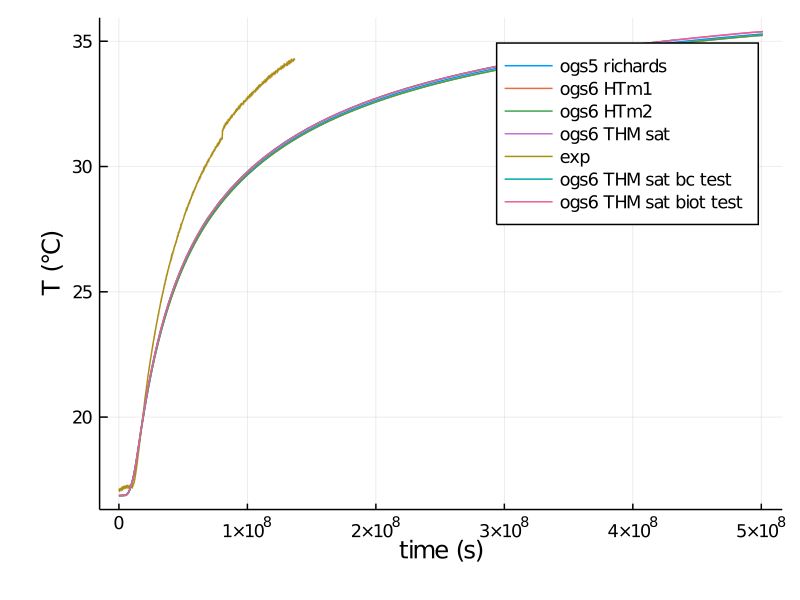

In [32]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[1].df["avg(TEMPERATURE1)"], label="ogs5 richards", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_HTm1[1].df["Time"],ogs6_HTm1[1].df["avg(temperature)"], label="ogs6 HTm1")
plot!(ogs6_HTm2[1].df["Time"],ogs6_HTm2[1].df["avg(temperature)"], label="ogs6 HTm2")
plot!(ogs6_THM[1].df["Time"],ogs6_THM[1].df["avg(temperature)"], label="ogs6 THM sat")
plot!(exp_temp[:,:time],exp_temp[:,"BFEA002_TEM_03"], label="exp")
plot!(ogs6_THM_bctest[1].df["Time"],ogs6_THM_bctest[1].df["avg(temperature)"], label="ogs6 THM sat bc test")
plot!(ogs6_THM_biottest[1].df["Time"],ogs6_THM_biottest[1].df["avg(temperature)"], label="ogs6 THM sat biot test")
xlabel!("time (s)")
ylabel!("T (°C)")

# PT1: pressure

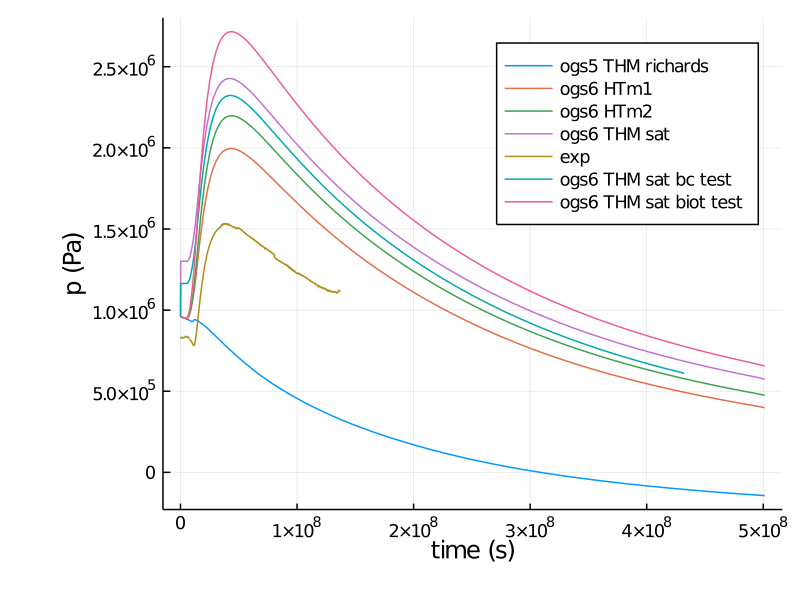

In [33]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[1].df[:pressure], label="ogs5 THM richards", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_HTm1[1].df["Time"],ogs6_HTm1[1].df["avg(pressure)"], label="ogs6 HTm1")
plot!(ogs6_HTm2[1].df["Time"],ogs6_HTm2[1].df["avg(pressure)"], label="ogs6 HTm2")
plot!(ogs6_THM[1].df["Time"],ogs6_THM[1].df["avg(pressure)"], label="ogs6 THM sat")
plot!(exp_press[:,:time],exp_press[:,"BFEA002_PRE_03"]*1000, label="exp")
plot!(ogs6_THM_bctest[1].df["Time"],ogs6_THM_bctest[1].df["avg(pressure)"], label="ogs6 THM sat bc test")
plot!(ogs6_THM_biottest[1].df["Time"],ogs6_THM_biottest[1].df["avg(pressure)"], label="ogs6 THM sat biot test")
xlabel!("time (s)")
ylabel!("p (Pa)")

# PT2: Temperature

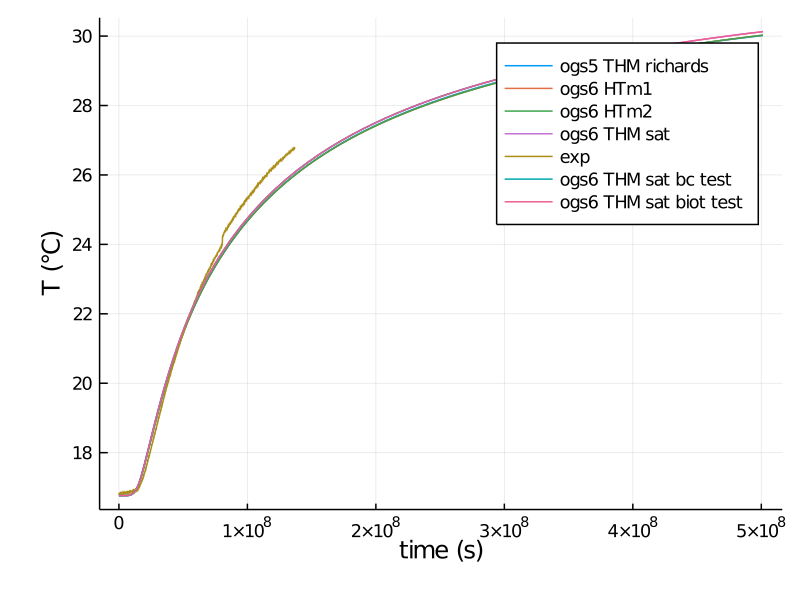

In [34]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[2].df["avg(TEMPERATURE1)"], label="ogs5 THM richards", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_HTm1[1].df["Time"],ogs6_HTm1[2].df["avg(temperature)"], label="ogs6 HTm1")
plot!(ogs6_HTm2[2].df["Time"],ogs6_HTm2[2].df["avg(temperature)"], label="ogs6 HTm2")
plot!(ogs6_THM[2].df["Time"],ogs6_THM[2].df["avg(temperature)"], label="ogs6 THM sat")
plot!(exp_temp[:,:time],exp_temp[:,"BFEA003_TEM_03"], label="exp")
plot!(ogs6_THM_bctest[2].df["Time"],ogs6_THM_bctest[2].df["avg(temperature)"], label="ogs6 THM sat bc test")
plot!(ogs6_THM_biottest[2].df["Time"],ogs6_THM_biottest[2].df["avg(temperature)"], label="ogs6 THM sat biot test")
xlabel!("time (s)")
ylabel!("T (°C)")

In [35]:
savefig("temp_pt2.pdf")

# PT2: pressure

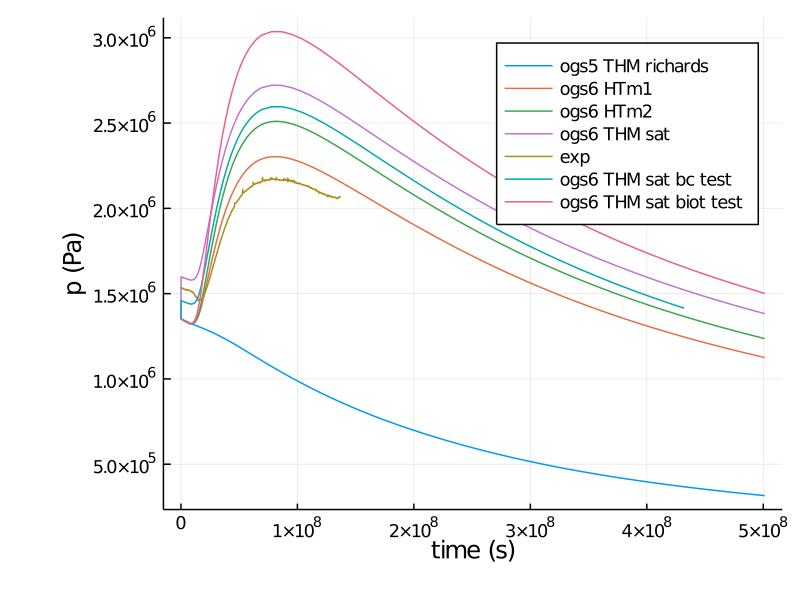

In [36]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[2].df[:pressure], label="ogs5 THM richards", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_HTm1[1].df["Time"],ogs6_HTm1[2].df["avg(pressure)"], label="ogs6 HTm1")
plot!(ogs6_HTm2[2].df["Time"],ogs6_HTm2[2].df["avg(pressure)"], label="ogs6 HTm2")
plot!(ogs6_THM[2].df["Time"],ogs6_THM[2].df["avg(pressure)"], label="ogs6 THM sat")
plot!(exp_press[:,:time],exp_press[:,"BFEA003_PRE_03"]*1000, label="exp")
plot!(ogs6_THM_bctest[2].df["Time"],ogs6_THM_bctest[2].df["avg(pressure)"], label="ogs6 THM sat bc test")
plot!(ogs6_THM_biottest[2].df["Time"],ogs6_THM_biottest[2].df["avg(pressure)"], label="ogs6 THM sat biot test")

xlabel!("time (s)")
ylabel!("p (Pa)")


In [37]:
savefig("press_pt2.pdf")

# PT3: Temperature

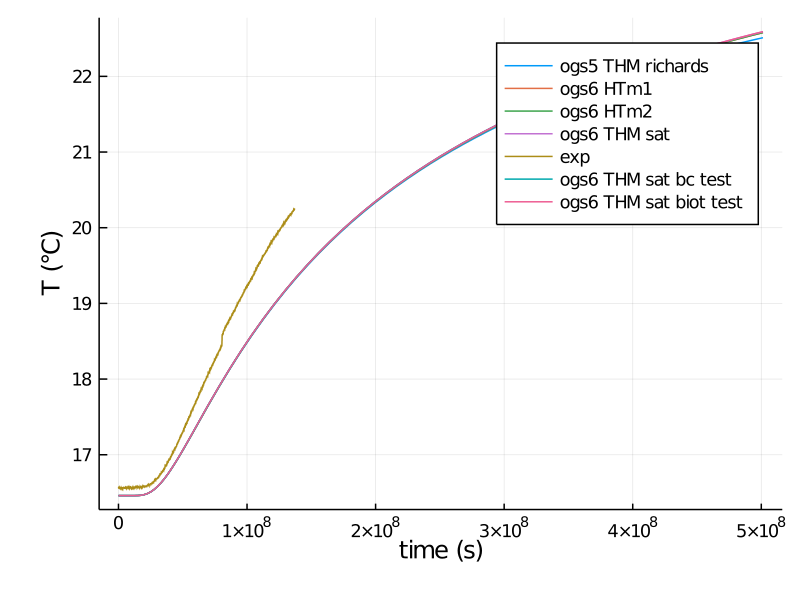

In [38]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[3].df["avg(TEMPERATURE1)"], label="ogs5 THM richards", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_HTm1[3].df["Time"],ogs6_HTm1[3].df["avg(temperature)"], label="ogs6 HTm1")
plot!(ogs6_HTm2[3].df["Time"],ogs6_HTm2[3].df["avg(temperature)"], label="ogs6 HTm2")
plot!(ogs6_THM[1].df["Time"],ogs6_THM[3].df["avg(temperature)"], label="ogs6 THM sat")
plot!(exp_temp[:,:time],exp_temp[:,"BFEA004_TEM_03"], label="exp")
plot!(ogs6_THM_bctest[3].df["Time"],ogs6_THM_bctest[3].df["avg(temperature)"], label="ogs6 THM sat bc test")
plot!(ogs6_THM_biottest[3].df["Time"],ogs6_THM_biottest[3].df["avg(temperature)"], label="ogs6 THM sat biot test")

xlabel!("time (s)")
ylabel!("T (°C)")

# PT3: pressure

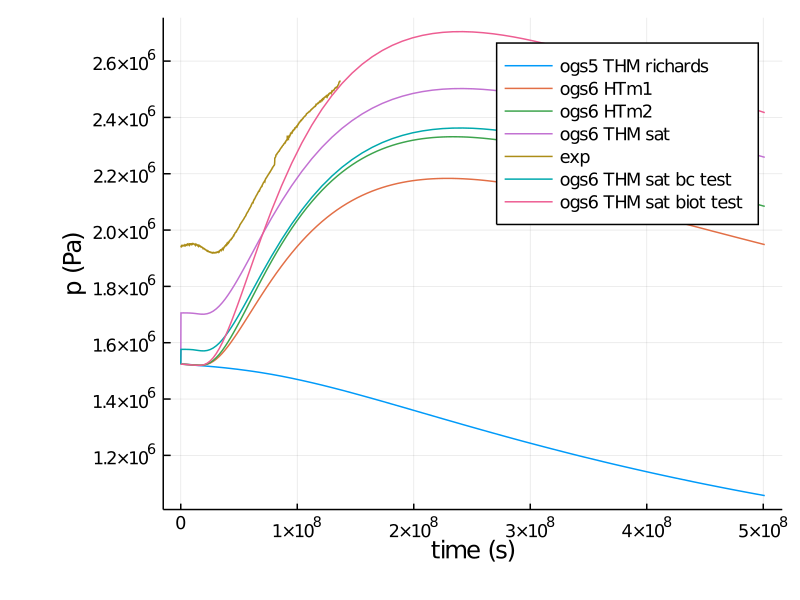

In [39]:
plot(ogs5_THM[1].df["Time_s"],ogs5_THM[3].df[:pressure], label="ogs5 THM richards", size=(800,600),thickness_scaling=1.5)
plot!(ogs6_HTm1[3].df["Time"],ogs6_HTm1[3].df["avg(pressure)"], label="ogs6 HTm1")
plot!(ogs6_HTm2[3].df["Time"],ogs6_HTm2[3].df["avg(pressure)"], label="ogs6 HTm2")
plot!(ogs6_THM[1].df["Time"],ogs6_THM[3].df["avg(pressure)"], label="ogs6 THM sat")
plot!(exp_press[:,:time],exp_press[:,"BFEA004_PRE_03"]*1000, label="exp")
plot!(ogs6_THM_bctest[3].df["Time"],ogs6_THM_bctest[3].df["avg(pressure)"], label="ogs6 THM sat bc test")
plot!(ogs6_THM_biottest[3].df["Time"],ogs6_THM_biottest[3].df["avg(pressure)"], label="ogs6 THM sat biot test")
xlabel!("time (s)")
ylabel!("p (Pa)")